In [ ]:
import tensorflow
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

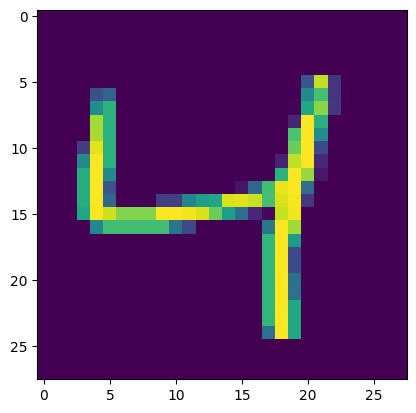

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2922 - accuracy: 0.9144 - val_loss: 0.1470 - val_accuracy: 0.9564
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1201 - accuracy: 0.9645 - val_loss: 0.1071 - val_accuracy: 0.9694
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0825 - accuracy: 0.9752 - val_loss: 0.0938 - val_accuracy: 0.9713
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0980 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.1114 - val_accuracy: 0.9694
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.1065 - val_accuracy: 0.9689
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.1006 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9737

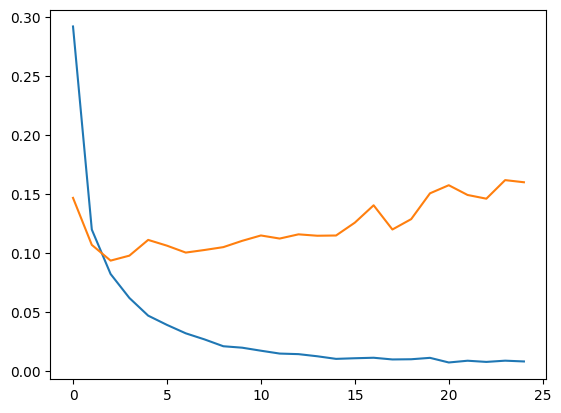

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

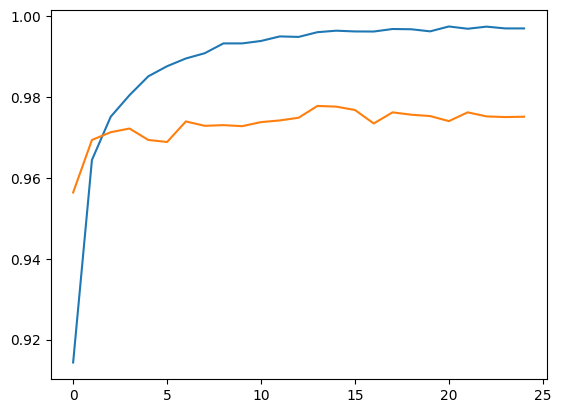

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

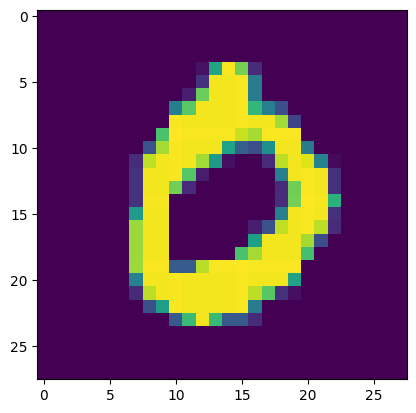

In [ ]:
plt.imshow(X_test[3])

In [ ]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 64ms/step


array([0])